# PyTorch workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch versino
torch.__version__

'2.2.1+cu121'

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Splitting data into training and test sets

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize our data

In [5]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_label, c='r', s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='g', s=4, label="predictions")

  plt.legend(prop={"size":14})

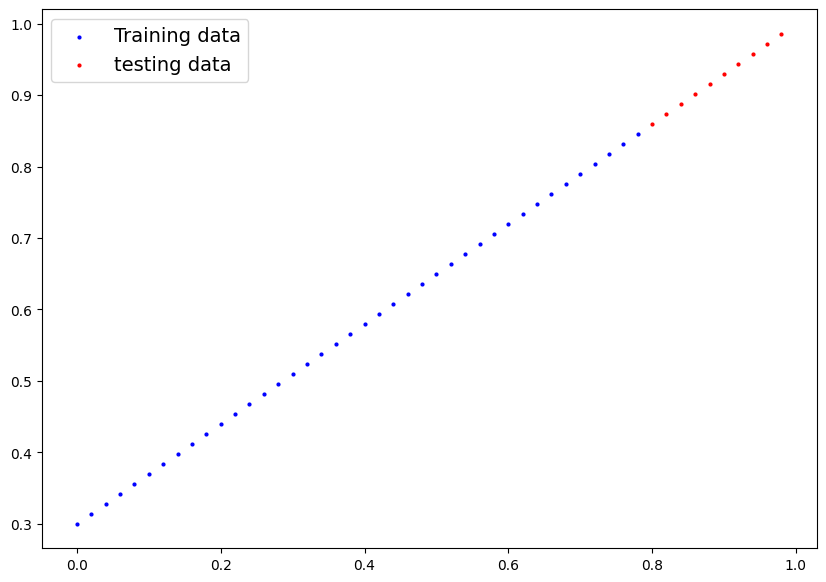

In [6]:
plot_predictions()

## 2. Build Model

In [7]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### Checking the contents of our PyTorch model


In [8]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [10]:
with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

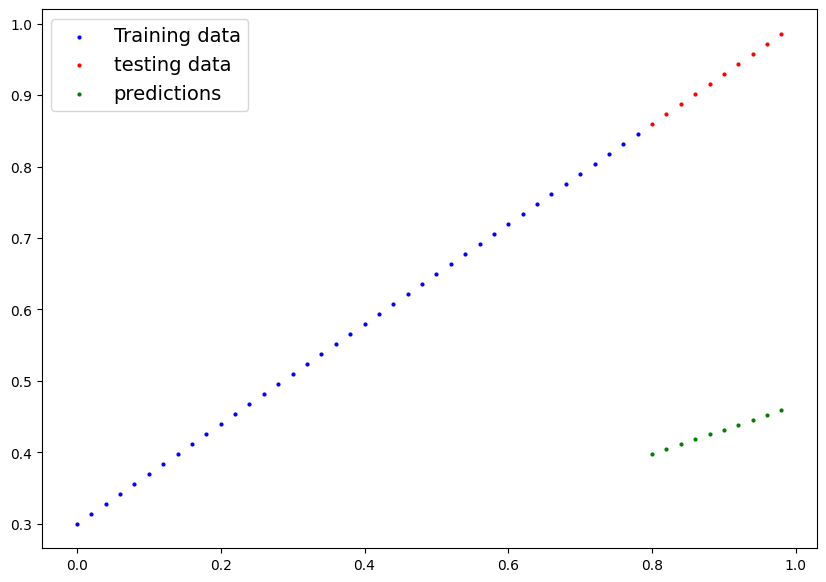

In [11]:
plot_predictions(predictions=y_preds)

## 3. Train model

In [12]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01)

In [13]:
loss_fn

L1Loss()

### Building a training loop in pytorch

In [76]:
epochs = 100
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

model_0.state_dict()

loss: 0.008997755125164986
loss: 0.008660981431603432
loss: 0.008311985060572624
loss: 0.007972544990479946
loss: 0.007626785431057215
loss: 0.0072835334576666355
loss: 0.006941580679267645
loss: 0.006594526115804911
loss: 0.006256377790123224
loss: 0.005907376762479544
loss: 0.005569315515458584
loss: 0.005222178064286709
loss: 0.004880306776612997
loss: 0.004536976106464863
loss: 0.00419129803776741
loss: 0.0038517764769494534
loss: 0.0035027749836444855
loss: 0.0031660839449614286
loss: 0.002817571861669421
loss: 0.0024770735763013363
loss: 0.0021323717664927244
loss: 0.0017880648374557495
loss: 0.0014518328243866563
loss: 0.0011887758737429976
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.0025885067880153656
loss: 0.008932482451200485
loss: 0.002588

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [77]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

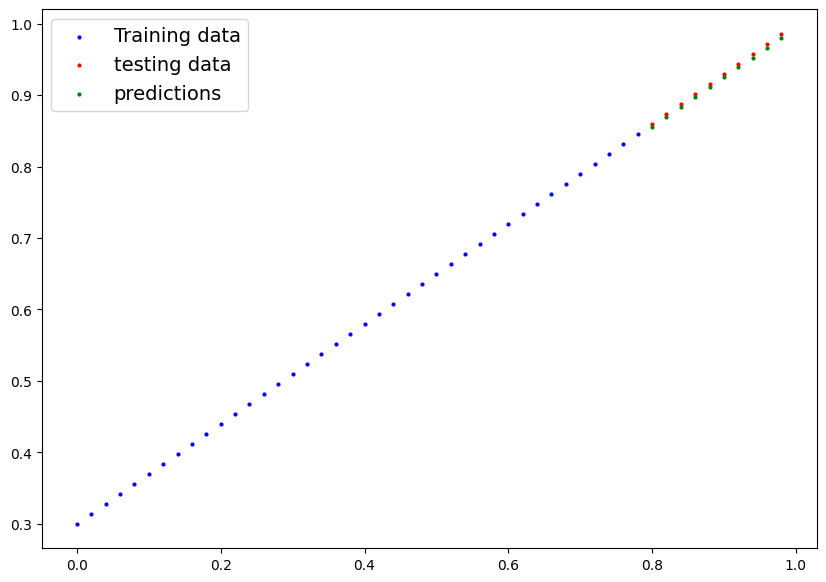

In [78]:
plot_predictions(predictions=y_pred_new)